In [1]:
# http://www.statsmodels.org/stable/examples/notebooks/generated/statespace_structural_harvey_jaeger.html
# Datasets
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from IPython.display import display, Latex

from pandas_datareader.data import DataReader
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv('Desktop/MT_vs_DD.csv')

In [3]:
raw_data.head()

,日期,呼叫数_MT,应答数_MT,完单量_MT,完单量_上限_MT,份额_MT,份额_上限_MT,客单价_MT,GMV_MT,应答率_MT,...,毛利率-回摊(含预估周冲单奖)_DD,单均毛利-回摊(含预估周冲单奖)_DD,司机实收-回摊(含预估周冲单奖)_DD,IPH-回摊_DD,IPH-回摊(含预估周冲单奖)_DD,毛利率差_DD,毛利率差_回摊_DD,总完单量,MT单量WOW,DD单量WOW
0,11/1/2017,NaN,NaN,46000.0,NaN,0.112075,NaN,18.48,850080.0,NaN,...,-0.427780,-7.804605,7736965.284,45.470102,45.470102,0.371537,0.173757,410441.0,NaN,NaN
1,11/2/2017,NaN,NaN,42000.0,NaN,0.102675,NaN,18.48,776160.0,NaN,...,-0.326227,-5.952646,6999732.079,40.583098,40.583098,-0.023165,0.226608,409058.0,NaN,NaN
2,11/3/2017,NaN,NaN,45000.0,NaN,0.092605,NaN,18.48,831600.0,NaN,...,-0.349263,-6.405713,8442692.642,43.671434,43.671434,0.268355,0.184092,485936.0,NaN,NaN
3,11/4/2017,NaN,NaN,48000.0,NaN,0.093635,NaN,18.48,887040.0,NaN,...,-0.323357,-5.894203,8662124.567,45.156861,45.156861,0.338117,0.239760,512629.0,NaN,NaN
4,11/5/2017,NaN,NaN,40000.0,NaN,0.086967,NaN,18.48,739200.0,NaN,...,-0.299035,-5.451901,7672629.064,44.398962,44.398962,0.305260,0.246225,459942.0,NaN,NaN


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 95 columns):
日期                       253 non-null object
呼叫数_MT                   159 non-null float64
应答数_MT                   39 non-null float64
完单量_MT                   253 non-null float64
完单量_上限_MT                66 non-null float64
份额_MT                    253 non-null float64
份额_上限_MT                 66 non-null float64
客单价_MT                   253 non-null float64
GMV_MT                   253 non-null float64
应答率_MT                   39 non-null float64
完单率_MT                   159 non-null float64
活跃乘客数_MT                 0 non-null float64
单均乘客补贴_MT                253 non-null float64
总乘客补贴_MT                 253 non-null float64
司机总在线时长 1_MT             149 non-null float64
司机总在线时长 2_MT             253 non-null float64
if 司机总在线时长 2>0_MT        253 non-null int64
司机总在线时长 2补_MT            253 non-null float64
活跃司机数 1_MT               131 non-null float64
活跃司机数 2_MT               24 no

In [5]:
raw_data = raw_data.set_index('日期')

In [6]:
raw_data.index = pd.to_datetime(raw_data.index)

In [7]:
raw_data.tail()

,呼叫数_MT,应答数_MT,完单量_MT,完单量_上限_MT,份额_MT,份额_上限_MT,客单价_MT,GMV_MT,应答率_MT,完单率_MT,...,毛利率-回摊(含预估周冲单奖)_DD,单均毛利-回摊(含预估周冲单奖)_DD,司机实收-回摊(含预估周冲单奖)_DD,IPH-回摊_DD,IPH-回摊(含预估周冲单奖)_DD,毛利率差_DD,毛利率差_回摊_DD,总完单量,MT单量WOW,DD单量WOW
日期,,,,,,,,,,,,,,,,,,,,,
2018-07-07,263422.1463,NaN,232606.7254,277328.2156,0.203596,0.233596,16.866667,3923300.103,NaN,0.883019,...,-0.670494,-10.321581,16087919.47,45.433513,48.491328,-0.082016,-0.154445,1142490.725,-0.205739,0.054200
2018-07-08,265188.7777,NaN,234823.6505,278337.0719,0.214209,0.244209,16.855556,3958083.086,NaN,0.885496,...,-0.669614,-10.296842,15292974.37,47.361013,50.534739,-0.070857,-0.143364,1096234.650,-0.267347,0.134037
2018-07-09,332473.6394,NaN,282956.2888,328510.5943,0.263905,0.293905,16.137704,4566264.803,NaN,0.851064,...,-0.536168,-8.467021,14074694.26,42.506603,47.575359,0.268744,0.148428,1072188.289,-0.038237,0.014444
2018-07-10,315619.6957,NaN,277544.9387,323079.6059,0.256160,0.286160,15.500000,4301946.551,NaN,0.879365,...,-0.496643,-8.000121,14564811.28,42.827108,47.858769,0.333464,0.215513,1083481.939,-0.078221,0.034710
2018-07-11,NaN,NaN,328469.0429,379153.4415,0.282998,0.312998,16.756643,5504038.456,NaN,NaN,...,-0.567864,-9.018814,14867342.98,63.903878,47.854663,-0.215196,0.161940,1160676.043,0.064497,0.019764


In [8]:
var = ['完单量_MT', '总乘客补贴_MT','完单量_DD']
df = raw_data[var]
df.index.name = 'Date'
df.columns = ['order_completed_MT', 'total_subsidy_MT', 'order_completed_DD']
dates = df.index._mpl_repr()

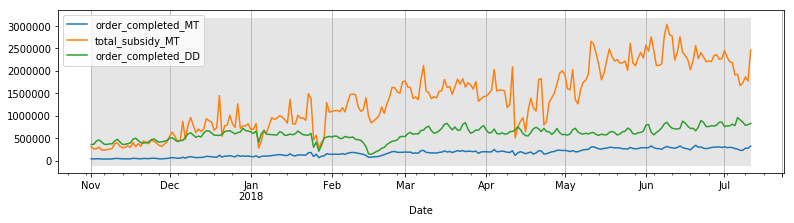

In [9]:
# plot the data
ax = df.plot(figsize=(13, 3))
ylim = ax.get_ylim()
ax.xaxis.grid()
ax.fill_between(dates, ylim[0]+1e-5, ylim[1]-1e-5, facecolor='k', alpha=0.1)

In [10]:
# Model specifications
# Unrestricted model, using string specification
unrestricted_model = {
    'level':'local linear trend', 
    'cycle': True,
    'damped_cycle': True,
    'stochastic_cycle': True
}

# The restricted model forces a smooth trend
restricted_model = {
    'level': 'smooth trend',
    'cycle': True,
    'damped_cycle': True,
    'stochastic_cycle':True
}

In [11]:
# order forecast for MT
order_MT_mod = sm.tsa.UnobservedComponents(df['order_completed_MT'], **unrestricted_model)
order_MT_res = order_MT_mod.fit(method='powell', disp=False)

/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [12]:
# order forecast for DD
order_DD_mod = sm.tsa.UnobservedComponents(df['order_completed_DD'], **unrestricted_model)
order_DD_res = order_DD_mod.fit(method='powell', disp=False)

order_DD_restricted_mod = sm.tsa.UnobservedComponents(df['order_completed_DD'], **restricted_model)
order_DD_restricted_res = order_DD_restricted_mod.fit(method='powell', disp=False)

/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [13]:
# subsidy forecast for MT
subsidy_MT_mod = sm.tsa.UnobservedComponents(df['total_subsidy_MT'], **unrestricted_model)
subsidy_MT_res = subsidy_MT_mod.fit(method='powell', disp=False)

subsidy_MT_restricted_mod = sm.tsa.UnobservedComponents(df['total_subsidy_MT'], **restricted_model)
subsidy_MT_restricted_res = subsidy_MT_restricted_mod.fit(method='powell', disp=False)

/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [14]:
print(order_MT_res.summary())

                            Unobserved Components Results                            
Dep. Variable:            order_completed_MT   No. Observations:                  253
Model:                    local linear trend   Log Likelihood               -2833.087
                   + damped stochastic cycle   AIC                           5678.175
Date:                       Mon, 23 Jul 2018   BIC                           5699.279
Time:                               21:38:38   HQIC                          5686.670
Sample:                           11-01-2017                                         
                                - 07-11-2018                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  2.513e-05      1.652   1.52e-05      1

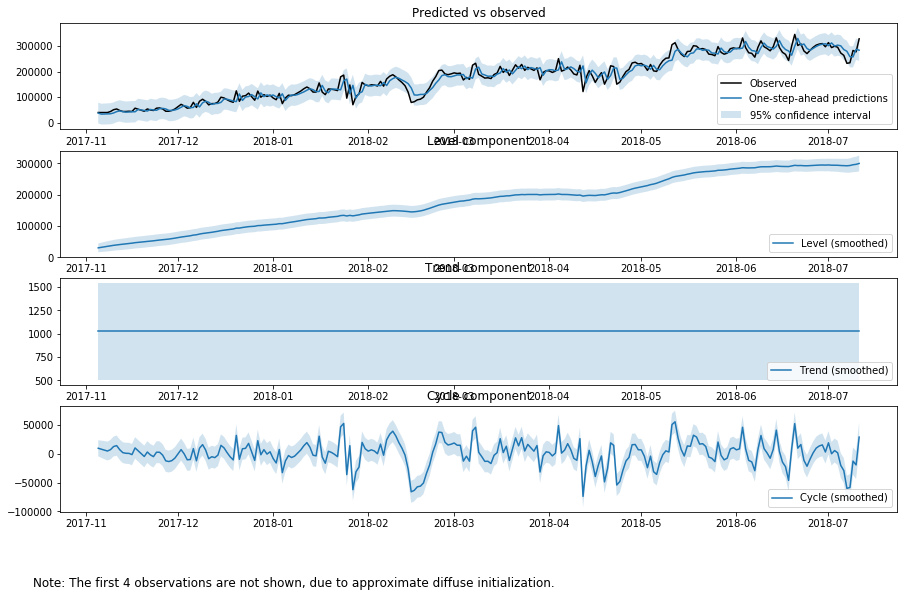

In [15]:
fig = order_MT_res.plot_components(legend_loc='lower right', figsize=(15, 9))

In [16]:
print(order_DD_res.summary())

                            Unobserved Components Results                            
Dep. Variable:            order_completed_DD   No. Observations:                  253
Model:                    local linear trend   Log Likelihood               -3089.337
                   + damped stochastic cycle   AIC                           6190.674
Date:                       Mon, 23 Jul 2018   BIC                           6211.779
Time:                               21:38:39   HQIC                          6199.169
Sample:                           11-01-2017                                         
                                - 07-11-2018                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  9.236e-10    236.914    3.9e-12      1

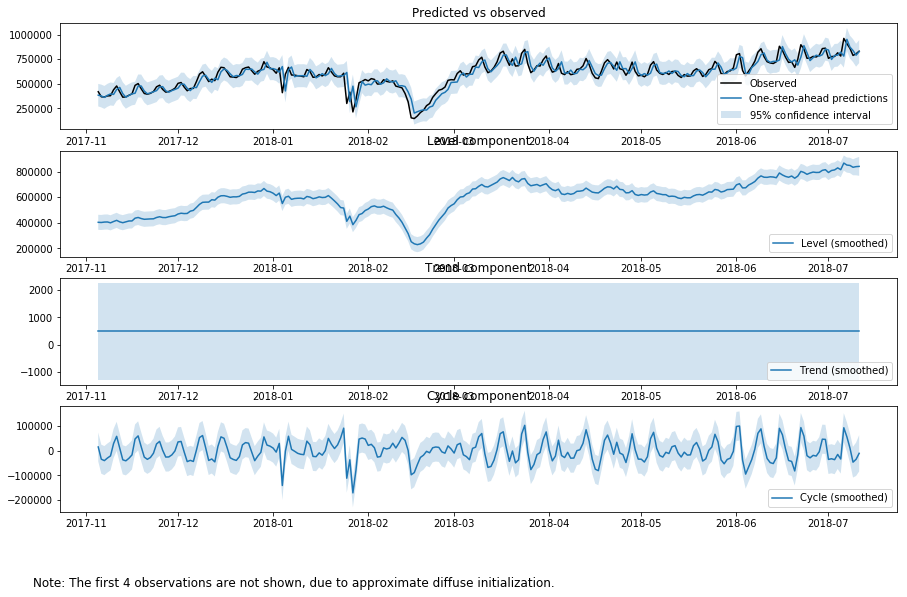

In [17]:
fig = order_DD_res.plot_components(legend_loc='lower right', figsize=(15,9))

In [18]:
order_MT_res.predict()

2017-11-01         0.000000
2017-11-02     35778.310025
2017-11-03     33700.297384
2017-11-04     35758.000959
2017-11-05     37997.115557
2017-11-06     33710.198843
2017-11-07     34172.134241
2017-11-08     34673.327180
2017-11-09     35197.371463
2017-11-10     38310.560251
2017-11-11     43546.199080
2017-11-12     46440.551465
2017-11-13     43475.244170
2017-11-14     41518.897107
2017-11-15     42006.764651
2017-11-16     43122.070640
2017-11-17     42896.549542
2017-11-18     51995.490302
2017-11-19     50167.713420
2017-11-20     48087.481414
2017-11-21     45776.594204
2017-11-22     52015.664684
2017-11-23     49846.245236
2017-11-24     48802.637947
2017-11-25     55046.862825
2017-11-26     56250.880504
2017-11-27     54075.661225
2017-11-28     48323.580959
2017-11-29     48219.907164
2017-11-30     50134.673009
                  ...      
2018-06-12    294201.209581
2018-06-13    288565.499042
2018-06-14    298928.747035
2018-06-15    321738.074107
2018-06-16    298902

In [19]:
print(subsidy_MT_res.summary())

                            Unobserved Components Results                            
Dep. Variable:              total_subsidy_MT   No. Observations:                  253
Model:                    local linear trend   Log Likelihood               -3451.843
                   + damped stochastic cycle   AIC                           6915.685
Date:                       Mon, 23 Jul 2018   BIC                           6936.790
Time:                               21:38:40   HQIC                          6924.180
Sample:                           11-01-2017                                         
                                - 07-11-2018                                         
Covariance Type:                         opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  5.059e-10   8.76e-12     57.748      0

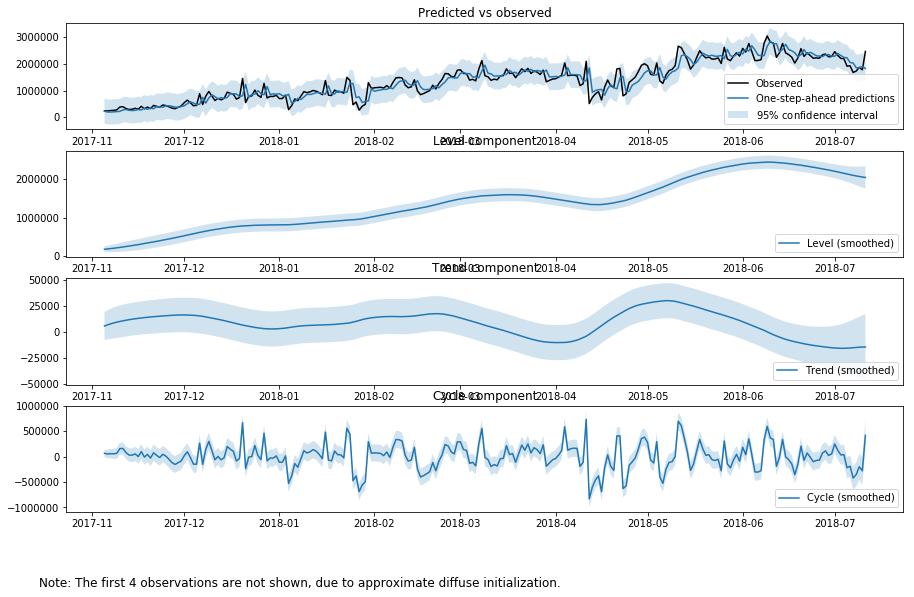

In [20]:
fig = subsidy_MT_res.plot_components(legend_loc='lower right', figsize=(15,9))

In [21]:
order_MT_res.predict().tail()

2018-07-07    279723.356202
2018-07-08    258452.664269
2018-07-09    257914.760853
2018-07-10    287435.869634
2018-07-11    283947.128495
Freq: D, dtype: float64

In [22]:
order_MT_res.predict('2018-07-12')

2018-07-12    316847.032492
Freq: D, dtype: float64

In [23]:
predict = order_MT_res.predict(end='2018-07-30',dynamic='2018-07-11')

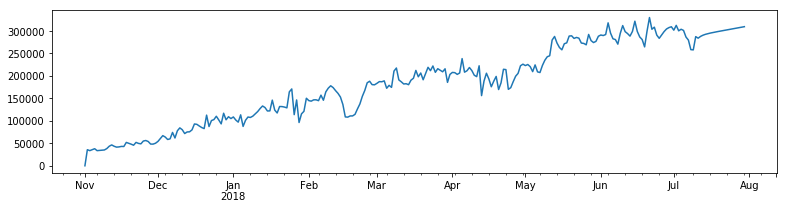

In [24]:
predict.plot(figsize=(13, 3))

In [25]:
order_MT_res.predict(start='2018-07-12', end='2018-07-30')

2018-07-12    316847.032492
2018-07-13    310845.619144
2018-07-14    307966.889786
2018-07-15    306823.057129
2018-07-16    306643.096121
2018-07-17    306998.641668
2018-07-18    307651.703247
2018-07-19    308470.058398
2018-07-20    309380.247134
2018-07-21    310341.456655
2018-07-22    311331.012236
2018-07-23    312336.316285
2018-07-24    313350.369847
2018-07-25    314369.284452
2018-07-26    315390.899749
2018-07-27    316414.015493
2018-07-28    317437.964853
2018-07-29    318462.377353
2018-07-30    319487.047163
Freq: D, dtype: float64

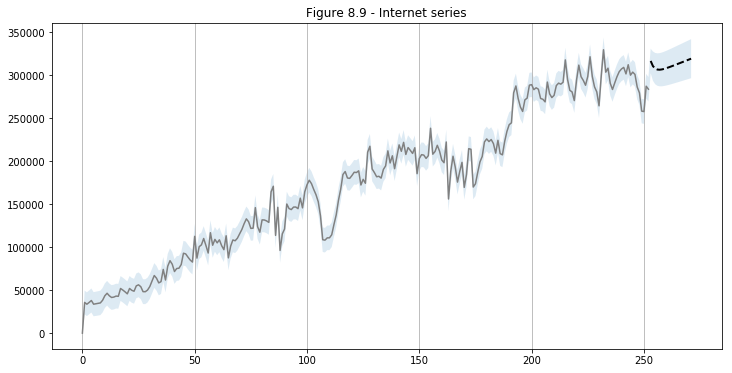

In [26]:
# In-sample one-step-ahead predictions, and out-of-sample forecasts
nforecast = 19
predict = order_MT_res.get_prediction(end='2018-07-30',dynamic='2018-07-12')
idx = np.arange(len(predict.predicted_mean))
predict_ci = predict.conf_int(alpha=0.5)

# Graph
fig, ax = plt.subplots(figsize=(12,6))
ax.xaxis.grid()

# Plot
ax.plot(idx[:-nforecast], predict.predicted_mean[:-nforecast], 'gray')
ax.plot(idx[-nforecast:], predict.predicted_mean[-nforecast:], 'k--', linestyle='--', linewidth=2)
ax.fill_between(idx, predict_ci.iloc[:, 0], predict_ci.iloc[:, 1], alpha=0.15)

ax.set(title='Figure 8.9 - Internet series');

In [27]:
# ts forecast with facebook Prophet
from fbprophet import Prophet

In [28]:
df = raw_data['完单量_MT'].reset_index()
df.columns = ['ds', 'y']

In [29]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/gaoziyao/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [30]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
278,2018-08-06
279,2018-08-07
280,2018-08-08
281,2018-08-09
282,2018-08-10


In [31]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
278,2018-08-06,334608.513773,300028.836334,369584.361130
279,2018-08-07,340197.865811,309145.247248,376070.741679
280,2018-08-08,353615.511130,321244.443935,388365.842536
281,2018-08-09,339813.575088,306465.226072,373232.844920
282,2018-08-10,352383.650925,321372.962517,388034.215228


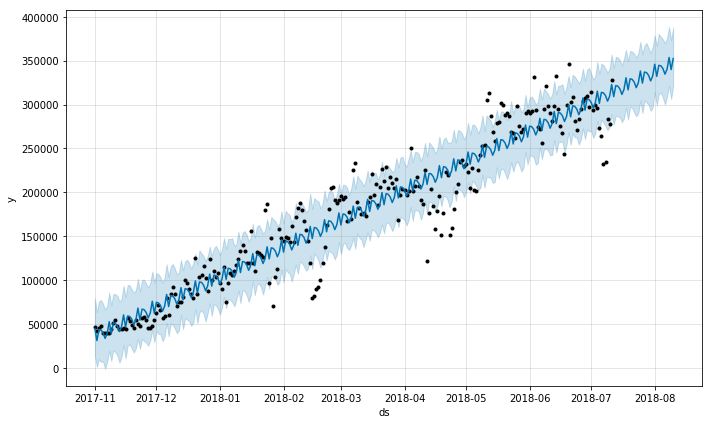

In [32]:
fig1 = m.plot(forecast)

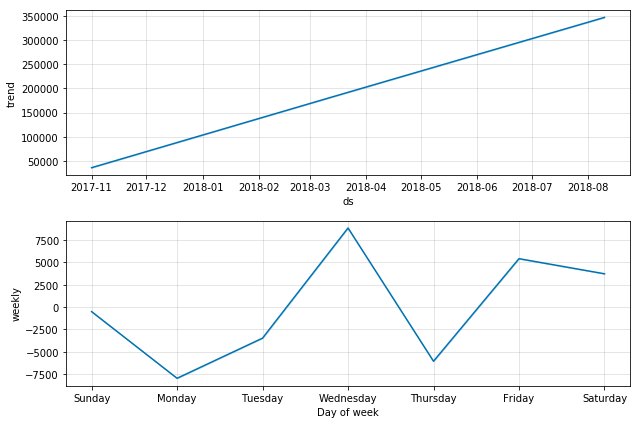

In [33]:
fig2 = m.plot_components(forecast)

In [34]:
names = ['完单量_MT', '总拼车动折_DD']
dta = raw_data[names]

In [35]:
dta.head()

,完单量_MT,总拼车动折_DD
Date,,
2017-11-01,46000.0,115344.0
2017-11-02,42000.0,119225.0
2017-11-03,45000.0,144202.0
2017-11-04,48000.0,148902.0
2017-11-05,40000.0,135038.0


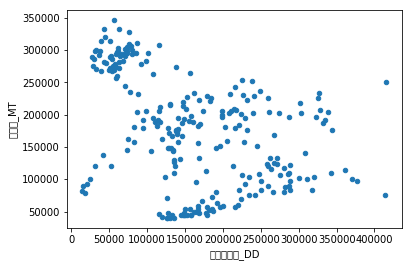

In [37]:
dta.plot(x='总拼车动折_DD', y='完单量_MT', kind='scatter')

In [38]:
res = sm.OLS(dta['完单量_MT'], dta['总拼车动折_DD']).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 完单量_MT   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     239.9
Date:                Mon, 23 Jul 2018   Prob (F-statistic):           1.80e-38
Time:                        21:50:22   Log-Likelihood:                -3355.6
No. Observations:                 253   AIC:                             6713.
Df Residuals:                     252   BIC:                             6717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
总拼车动折_DD       0.7360      0.048     15.489      0.0

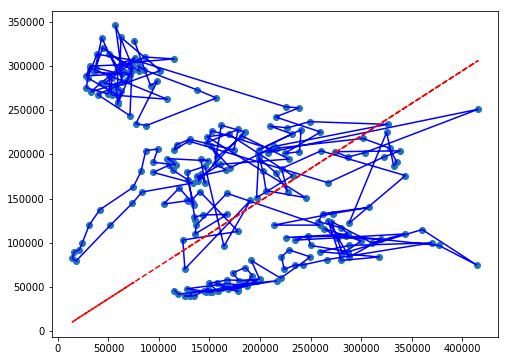

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dta['总拼车动折_DD'],dta['完单量_MT'], 'o', label='data')
ax.plot(dta['总拼车动折_DD'],dta['完单量_MT'], 'b-', label='data')
ax.plot(dta['总拼车动折_DD'],res.fittedvalues, 'r--', label='OLS')


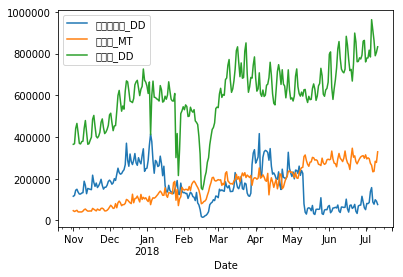

In [44]:
raw_data[['总拼车动折_DD','完单量_MT','完单量_DD']].plot()